In [2]:
#from TrackNet import *
#from tracknet2 import TrackNet
from model import BallTrackerNet
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import torch

class Options(object):
    def __init__(self, _dict):
        self.__dict__.update(_dict)

In [2]:
dict = {
    'grayscale': False,
    'sequence_length': 1,
    'dropout': 1e-16,
    'one_output_frame': True,
}

opt = Options(dict)

In [3]:
model = BallTrackerNet(out_channels=256)

In [4]:
model.load_state_dict(torch.load("model_best.pt", map_location=torch.device('cpu')))

<All keys matched successfully>

In [17]:
img1 = Image.open('data/Dataset/game1/Clip1/0034.jpg').resize((640, 360))
img1 = torch.from_numpy(np.array(img1)).float().permute(2, 0, 1).unsqueeze(0)

img2 = Image.open('data/Dataset/game1/Clip1/0035.jpg').resize((640, 360))
img2 = torch.from_numpy(np.array(img2)).float().permute(2, 0, 1).unsqueeze(0)

img3 = Image.open('data/Dataset/game1/Clip1/0036.jpg').resize((640, 360))
img3 = torch.from_numpy(np.array(img3)).float().permute(2, 0, 1).unsqueeze(0)

img = torch.cat((img1, img2, img3), dim=1)
img.shape
img = img / 255.0

In [18]:
# testing mode with pytorch
model.eval()
new = model(img)
new.shape

torch.Size([1, 256, 230400])

In [19]:
# transformer [1, 256, 921600] en [1, 256, 720, 1280]
new2 = new.view(1, 256, 360, 640)
new2.shape

torch.Size([1, 256, 360, 640])

In [20]:
new2 = new2.squeeze(0)
new2.shape

torch.Size([256, 360, 640])

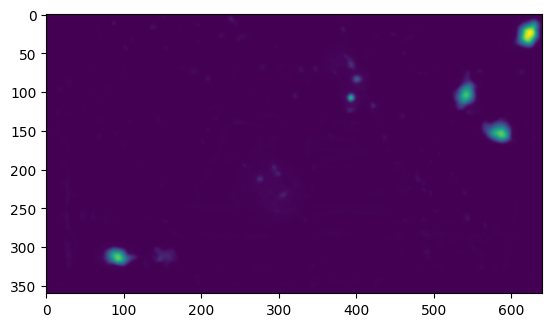

In [21]:
# softmax avec torch
#new3 = torch.nn.functional.softmax(new2, dim=0)
new3 = new2.mean(dim=0)
new3.shape
#plot
plt.imshow(new3.detach().numpy())

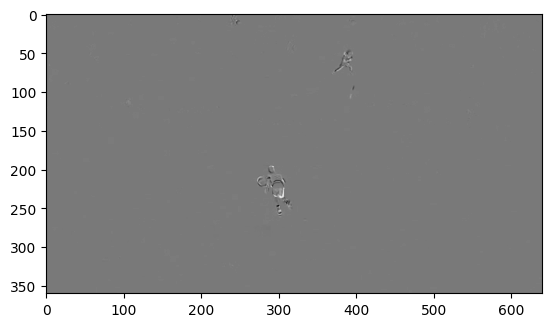

In [11]:
img1 = Image.open('data/Dataset/game1/Clip1/0034.jpg').resize((640, 360))
img2 = Image.open('data/Dataset/game1/Clip1/0035.jpg').resize((640, 360))
# difference entre 1 et 2
img1 = np.array(img1)
img2 = np.array(img2)
#greyscale avec Image de PIL
img1 = img1.mean(axis=2)
img2 = img2.mean(axis=2)
diff = img1 - img2
plt.imshow(diff, cmap='gray')
